In [2]:
#Importamos las librerias estandar necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Descargamos los datos
url = 'https://drive.google.com/file/d/1lqdL5E3pjC0ISjsEe_F1N8xIKK8y-0nz/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(download_url)

# Limpiamos los datos inservibles

In [17]:
df = df.set_index('id')
df.columns

KeyError: "None of ['id'] are in the columns"

In [18]:
df.columns

Index(['name', 'release_date', 'artists', 'total_tracks', 't_name0', 't_name1',
       't_name2', 't_dur0', 't_dur1', 't_dur2', 't_dance0', 't_dance1',
       't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0', 't_key1',
       't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0', 't_speech1',
       't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0', 't_ins1',
       't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1', 't_val2',
       't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2',
       'popularity', 'average_duration'],
      dtype='object')

In [6]:
nulos = df.isna().sum()
nulos

name                0
release_date        0
artists             0
total_tracks        0
t_name0             0
t_name1         47716
t_name2         51533
t_dur0              0
t_dur1          47716
t_dur2          51533
t_dance0          214
t_dance1        47841
t_dance2        51610
t_energy0         214
t_energy1       47841
t_energy2       51610
t_key0            214
t_key1          47841
t_key2          51610
t_mode0           214
t_mode1         47841
t_mode2         51610
t_speech0         214
t_speech1       47841
t_speech2       51610
t_acous0          214
t_acous1        47841
t_acous2        51610
t_ins0            214
t_ins1          47841
t_ins2          51610
t_live0           214
t_live1         47841
t_live2         51610
t_val0            214
t_val1          47841
t_val2          51610
t_tempo0          214
t_tempo1        47841
t_tempo2        51610
t_sig0            214
t_sig1          47841
t_sig2          51610
popularity          0
dtype: int64

In [7]:
duplicados = df.duplicated().sum()
duplicados

87643

In [8]:
print(df.shape)
df = df.dropna()
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(160000, 44)
(108213, 44)
(39837, 44)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39837 entries, 0 to 159976
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          39837 non-null  object 
 1   release_date  39837 non-null  object 
 2   artists       39837 non-null  object 
 3   total_tracks  39837 non-null  int64  
 4   t_name0       39837 non-null  object 
 5   t_name1       39837 non-null  object 
 6   t_name2       39837 non-null  object 
 7   t_dur0        39837 non-null  int64  
 8   t_dur1        39837 non-null  float64
 9   t_dur2        39837 non-null  float64
 10  t_dance0      39837 non-null  float64
 11  t_dance1      39837 non-null  float64
 12  t_dance2      39837 non-null  float64
 13  t_energy0     39837 non-null  float64
 14  t_energy1     39837 non-null  float64
 15  t_energy2     39837 non-null  float64
 16  t_key0        39837 non-null  float64
 17  t_key1        39837 non-null  float64
 18  t_key2        39837 non-n

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_tracks,39837.0,13.857796,18.835366,3.0,8.0000,12.000000,15.000,1190.000
t_dur0,39837.0,213221.532721,139486.047759,1485.0,147792.0000,200026.000000,251666.000,4449616.000
t_dur1,39837.0,222159.833471,128179.878397,4120.0,166335.0000,207826.000000,254302.000,7054236.000
t_dur2,39837.0,221847.772498,117355.183524,4285.0,166053.0000,208538.000000,256040.000,4520334.000
t_dance0,39837.0,0.569091,0.190296,0.0,0.4470,0.591000,0.713,0.988
t_dance1,39837.0,0.591304,0.184816,0.0,0.4760,0.614000,0.729,0.992
t_dance2,39837.0,0.591431,0.184972,0.0,0.4750,0.614000,0.731,0.982
t_energy0,39837.0,0.588915,0.254084,0.0,0.4130,0.619000,0.797,1.000
t_energy1,39837.0,0.605467,0.248591,0.0,0.4450,0.638000,0.806,1.000
t_energy2,39837.0,0.595003,0.248774,0.0,0.4290,0.625000,0.795,1.000


## Eliminamos los duplicados

## Creamos una columna de duración promedio

In [11]:
df['average_duration'] = ( df['t_dur0'] + df['t_dur1'] + df['t_dur2'] ) / 3
print(df['average_duration'].isna().sum())
serie_sin_valores_nulos = df['average_duration'].dropna()
print(serie_sin_valores_nulos.isna().sum())
serie_sin_valores_nulos = serie_sin_valores_nulos.astype(int)

0
0


## Para el análisis bivariado hacemos una matriz de correlaciones

In [12]:
matriz_correlaciones = df.corr()
matriz_correlaciones

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity,average_duration
total_tracks,1.000000,-0.061112,-0.027622,-0.045770,-0.062216,-0.056352,-0.048721,-0.087688,-0.080086,-0.077234,...,-0.005458,0.000979,-0.012344,-0.028406,-0.019804,-0.048784,-0.058219,-0.039282,0.051424,-0.052991
t_dur0,-0.061112,1.000000,0.552040,0.547762,-0.084331,-0.144022,-0.138284,0.044605,-0.043068,-0.031648,...,-0.071924,-0.071466,0.022014,-0.017835,-0.014667,0.049904,-0.016517,-0.024065,-0.057246,0.834337
t_dur1,-0.027622,0.552040,1.000000,0.695841,-0.102197,-0.133951,-0.112285,0.009465,0.010408,0.010282,...,-0.092507,-0.054404,-0.017105,-0.009536,-0.019452,0.002853,0.002479,-0.012634,-0.046167,0.871759
t_dur2,-0.045770,0.547762,0.695841,1.000000,-0.099680,-0.118947,-0.130373,0.033579,0.030565,0.035556,...,-0.056396,-0.094203,-0.011969,-0.008389,-0.012565,0.002833,-0.008815,0.013809,-0.041286,0.859939
t_dance0,-0.062216,-0.084331,-0.102197,-0.099680,1.000000,0.605523,0.598268,0.191891,0.118519,0.124168,...,0.320462,0.307757,0.056745,0.070638,0.063501,0.217267,0.116121,0.122669,-0.019276,-0.111113
t_dance1,-0.056352,-0.144022,-0.133951,-0.118947,0.605523,1.000000,0.637584,0.135684,0.163387,0.144895,...,0.451107,0.302955,0.063102,-0.004515,0.063460,0.095099,0.192832,0.134303,0.010194,-0.155659
t_dance2,-0.048721,-0.138284,-0.112285,-0.130373,0.598268,0.637584,1.000000,0.130238,0.140544,0.175384,...,0.313072,0.450436,0.065575,0.066151,-0.007116,0.099020,0.130035,0.197557,0.009612,-0.148862
t_energy0,-0.087688,0.044605,0.009465,0.033579,0.191891,0.135684,0.130238,1.000000,0.679548,0.665833,...,0.252055,0.238423,0.218206,0.151139,0.146548,0.155997,0.114706,0.111939,0.071824,0.034573
t_energy1,-0.080086,-0.043068,0.010408,0.030565,0.118519,0.163387,0.140544,0.679548,1.000000,0.722860,...,0.350625,0.228170,0.140063,0.204348,0.154075,0.081314,0.158546,0.125173,0.090997,-0.003302
t_energy2,-0.077234,-0.031648,0.010282,0.035556,0.124168,0.144895,0.175384,0.665833,0.722860,1.000000,...,0.231805,0.354149,0.138473,0.155623,0.205904,0.087807,0.119002,0.165981,0.078049,0.003271


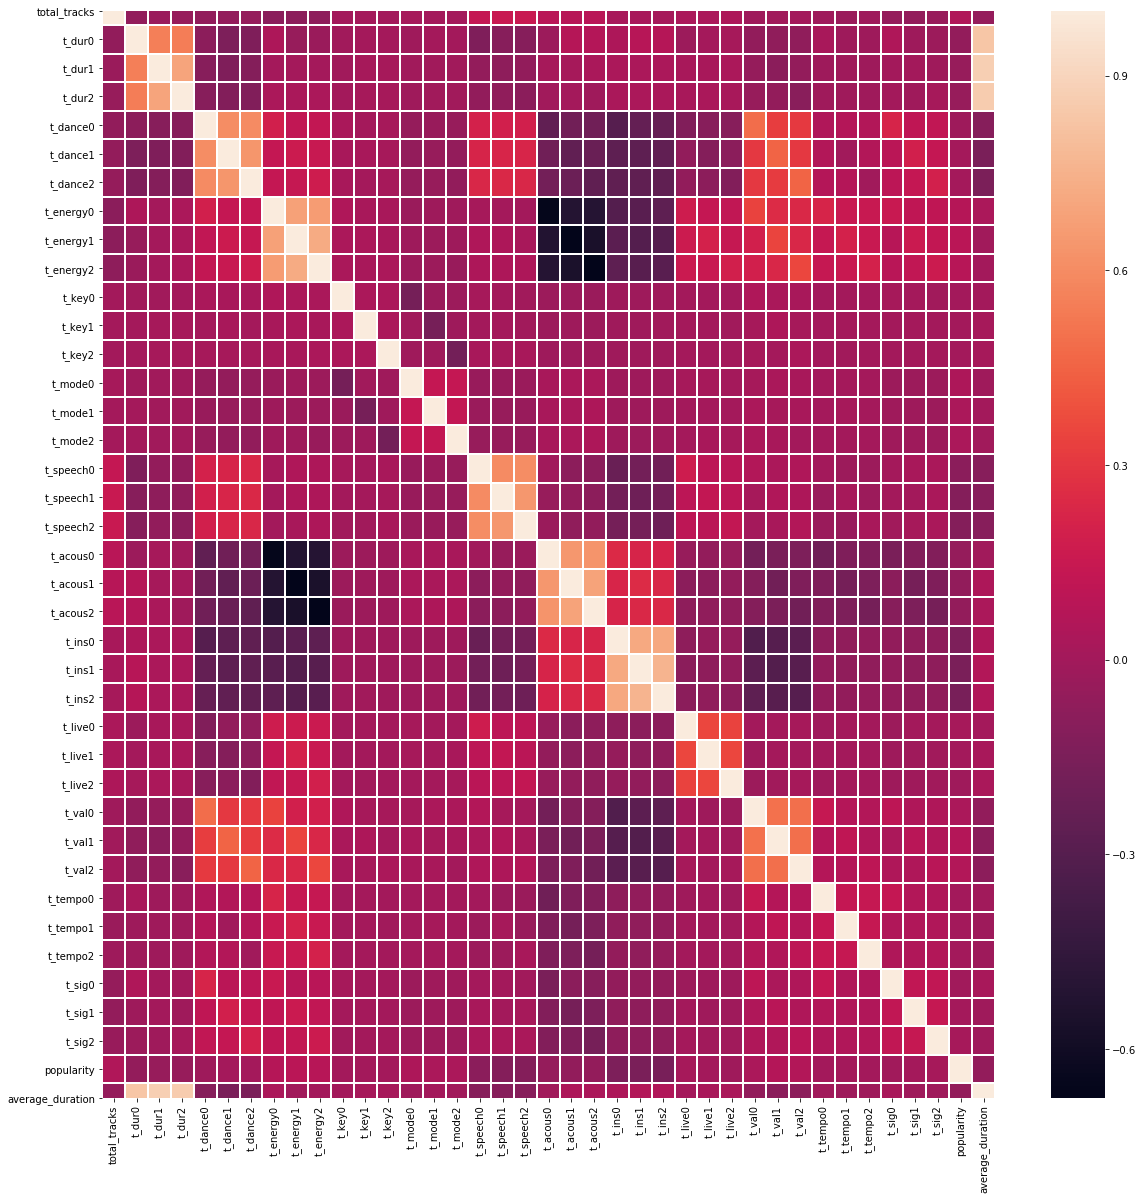

In [13]:
# Hacemos un heatmap con la matriz de correlaciones calculada anteriormente
# Usamos sns.heatmap()
plt.figure(figsize = (20,20))
sns.heatmap(matriz_correlaciones, linewidth = 1)

Text(0.5, 1, 'Altas Correlaciones')

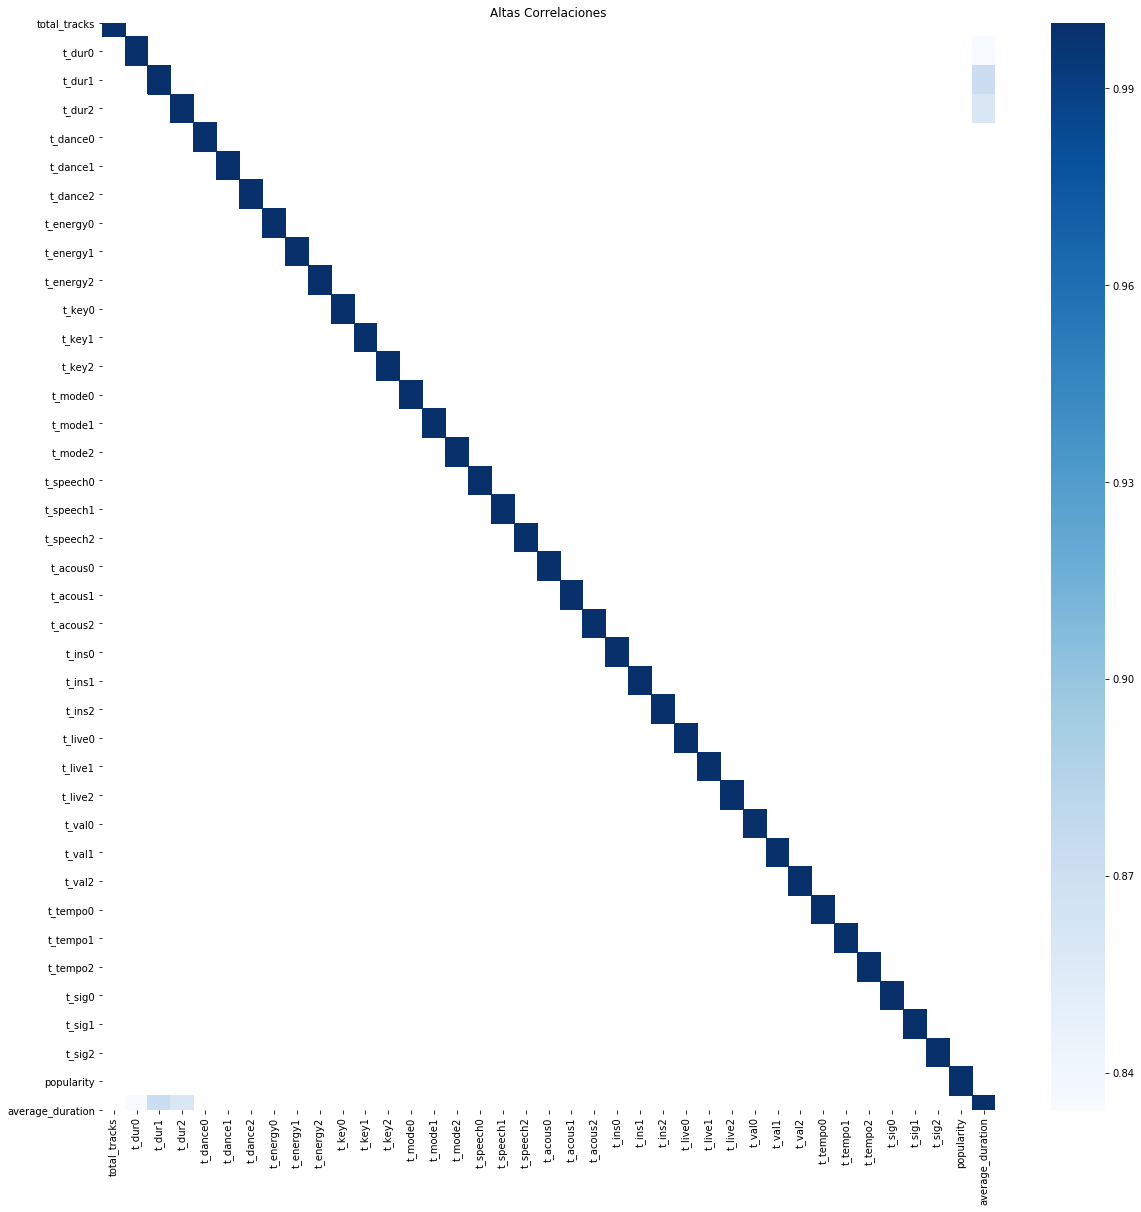

In [14]:
# Ahora hacemos una matriz donde solo se destacan las correlaciones altas
corr_alta =matriz_correlaciones[matriz_correlaciones >= 0.8]
plt.figure(figsize = (20, 20))
sns.heatmap(corr_alta, cmap = 'Blues')
plt.title('Altas Correlaciones')

## Observamos que solo hay altas correlaciones entre la duración de las canciones

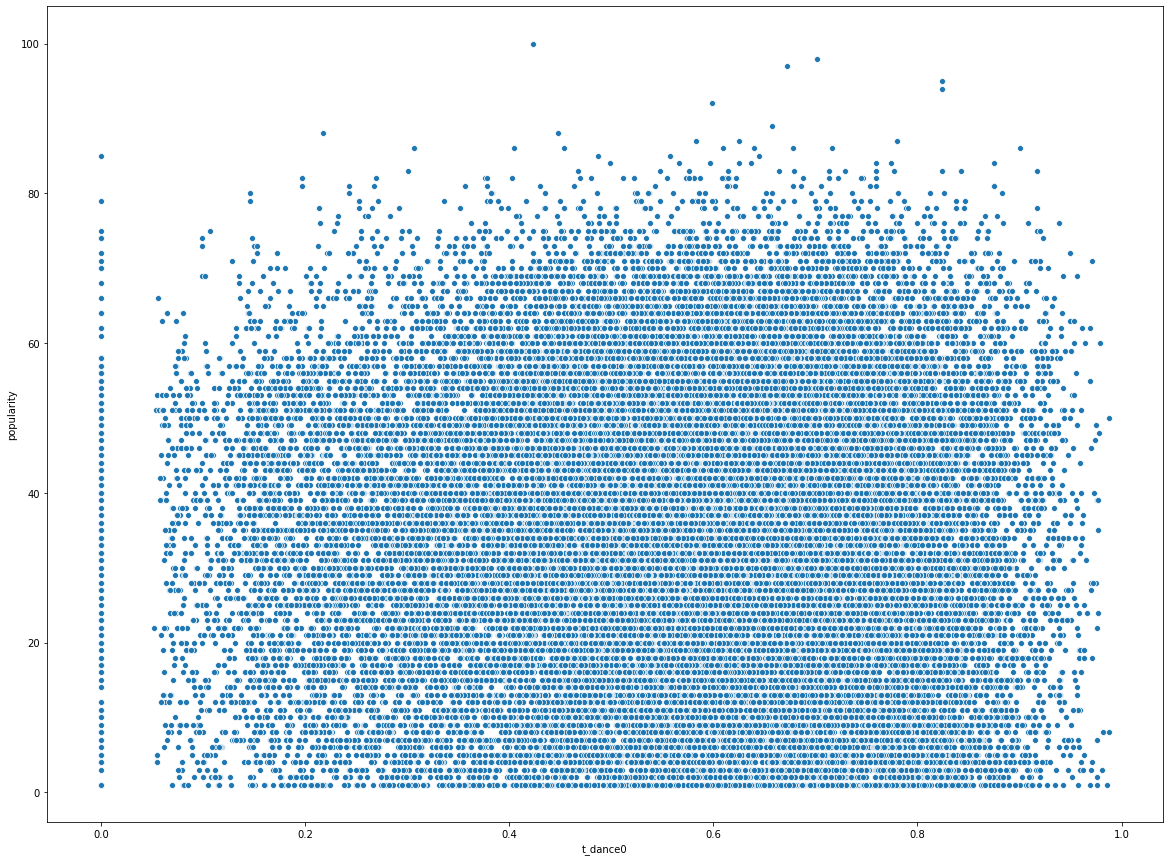

In [21]:
# Ahora hacemos un gráfico tipo boxplot, con las distribuciones de de t_dance0 y popularidad
plt.figure(figsize = (20, 15))
sns.scatterplot(x = 't_dance0', y = 'popularity', data = df)

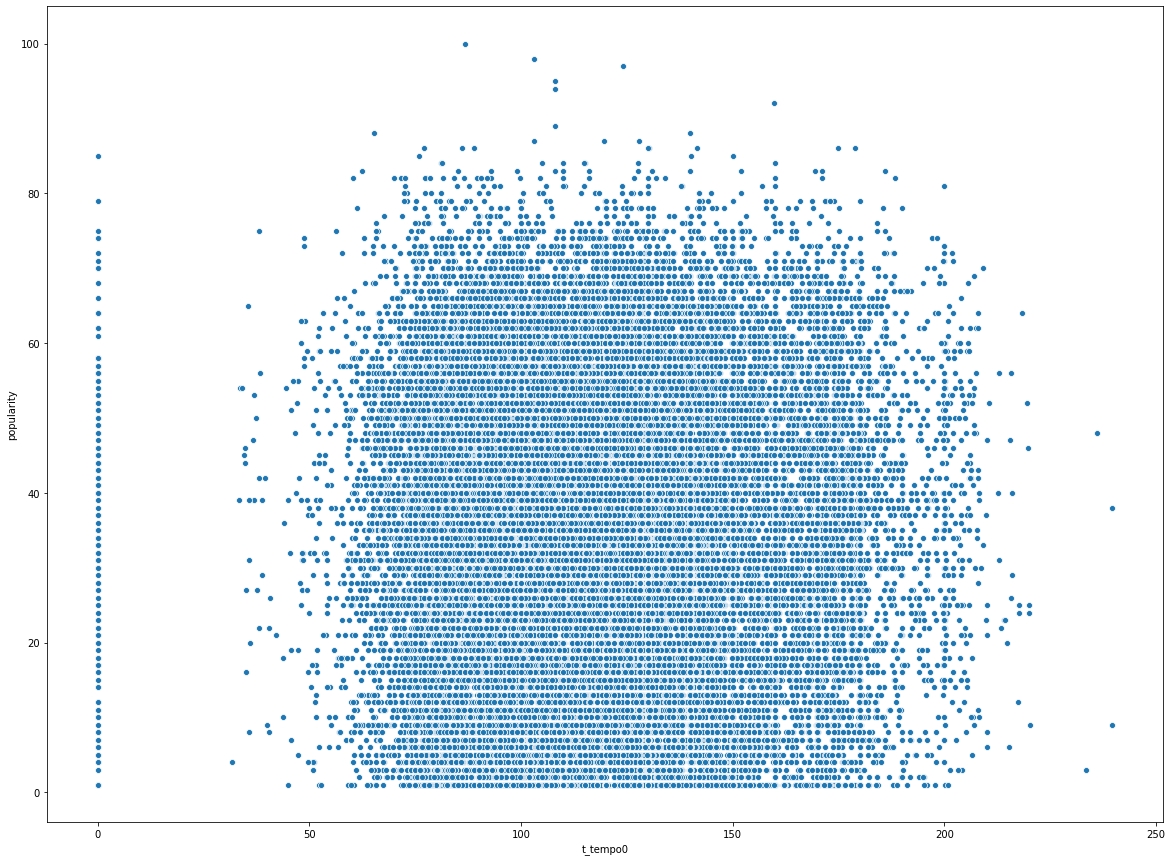

In [22]:
# Repetimos lo mismo pero con las variables tempo y energy
plt.figure(figsize = (20, 15))
sns.scatterplot(x = 't_tempo0', y = 'popularity', data = df)

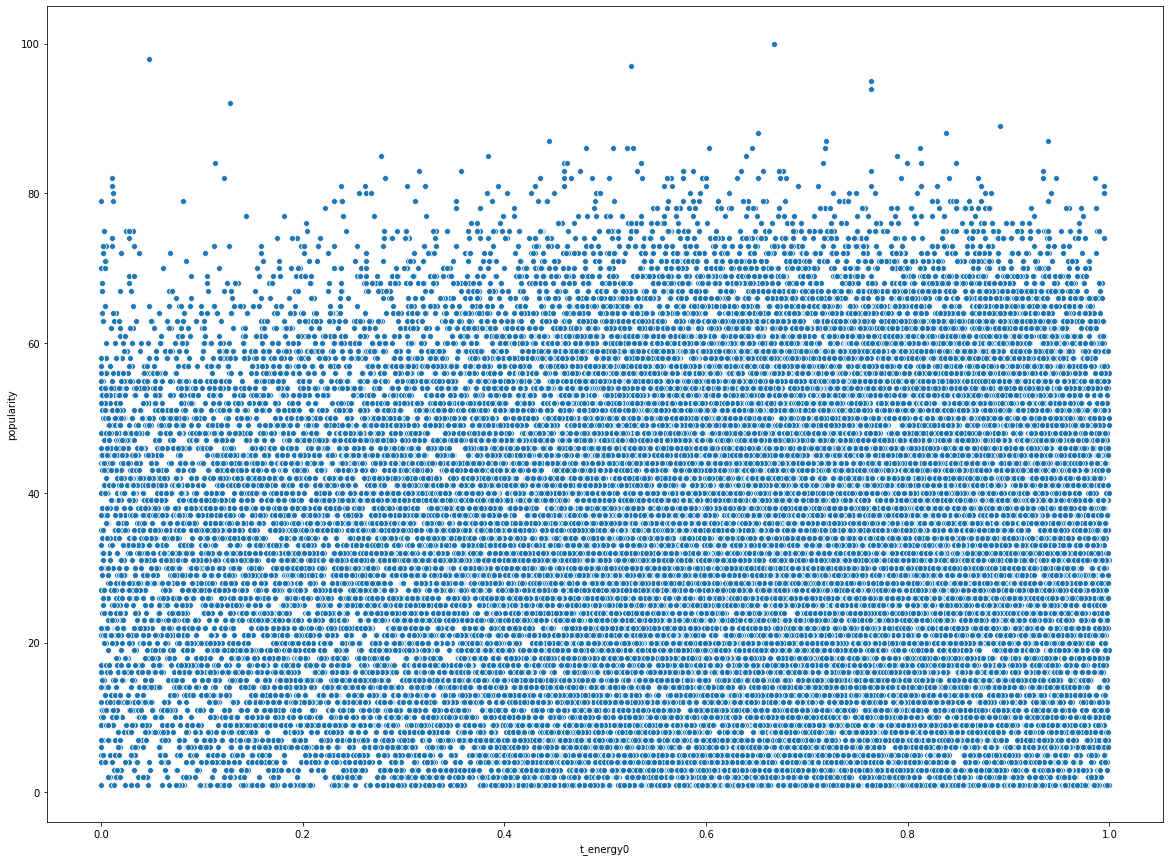

In [23]:
plt.figure(figsize = (20, 15))
sns.scatterplot(x = 't_energy0', y = 'popularity', data = df)

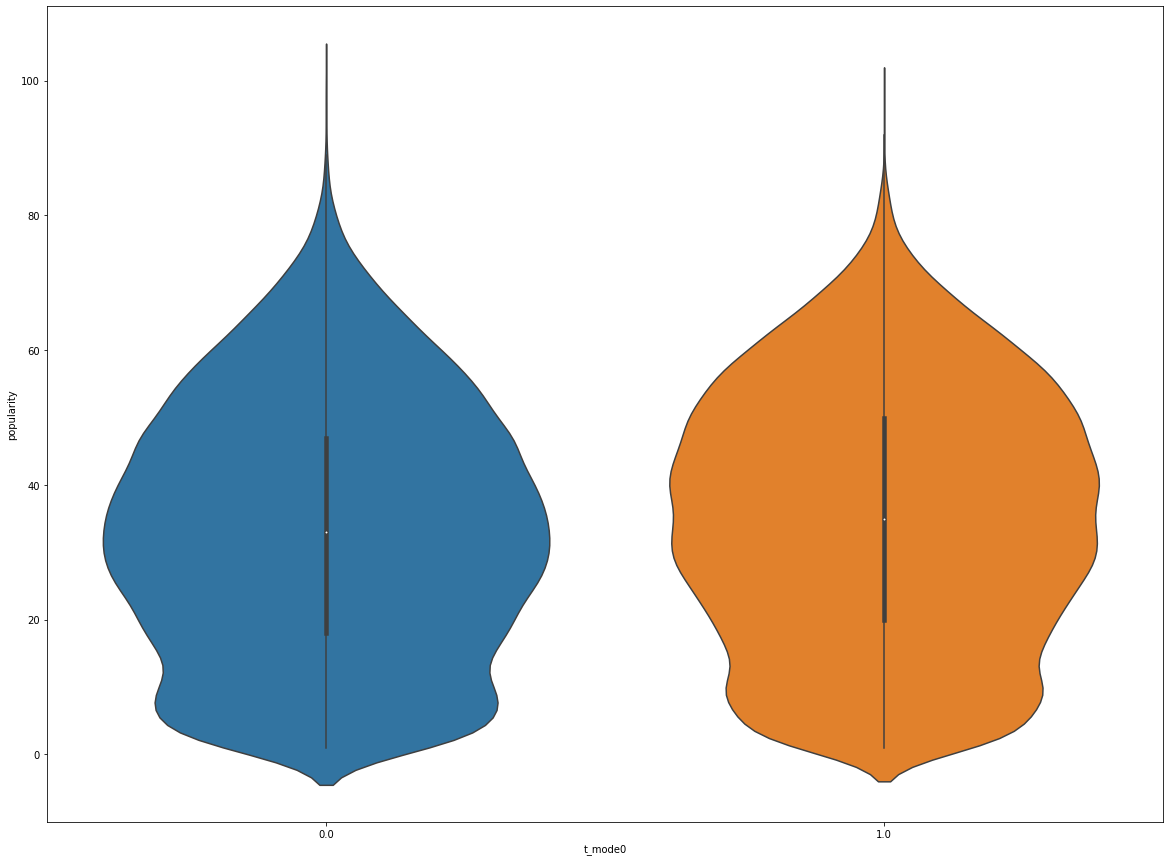

In [24]:
# Ahora vamos a haccer un violinplot 
plt.figure(figsize = (20, 15))
sns.violinplot(x = 't_mode0', y = 'popularity', data = df)

In [ ]:
# Es interesante notar una leve diferencia en los casos donde t_mode es 0.